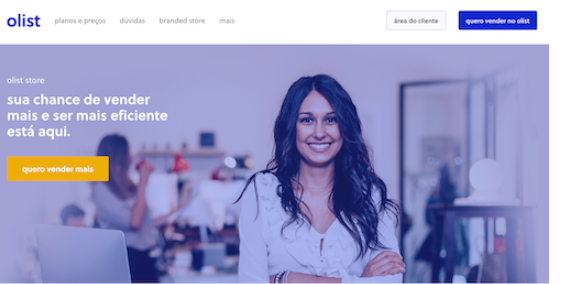

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
from datetime import date, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pca
from pca import pca
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('olist_cluster_analysis.csv')

# Time Clusters Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91074 entries, 0 to 91073
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_unique_id                       91074 non-null  object 
 1   order_approved_at                        91074 non-null  object 
 2   temps_session                            91074 non-null  float64
 3   experience_client                        91074 non-null  float64
 4   temps_livraison_estime                   91074 non-null  float64
 5   review_classification                    91074 non-null  float64
 6   temps_de_reponse                         91074 non-null  float64
 7   longueur_comment_message                 91074 non-null  float64
 8   bed_bath_table                           91074 non-null  float64
 9   health_beauty                            91074 non-null  float64
 10  sports_leisure                           91074

In [4]:
# To datetime au lieu d'object
df.order_approved_at  = pd.to_datetime(df.order_approved_at)

In [5]:
df['Month'] = df['order_approved_at'].dt.to_period('M')

## RFM

In [6]:
df_rfm = df.groupby(['Month', 'rfm_segment']).size().unstack().fillna(0).reset_index()

In [7]:
df_rfm['Month'] = df_rfm['Month'].astype('str')

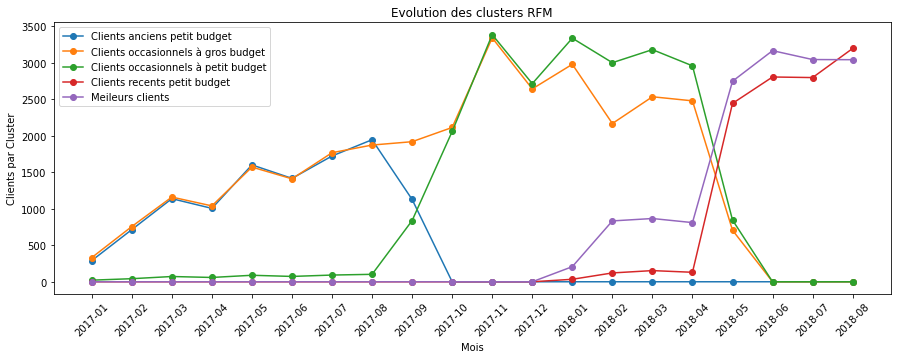

In [8]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()

for col in df_rfm.columns:
    if col != 'Month':
        ax.plot(df_rfm['Month'], df_rfm[col], marker='o', label=col)

plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.ylabel('Clients par Cluster')
plt.title('Evolution des clusters RFM')
plt.legend()
plt.show()

## Kmeans

In [9]:
df_kmeans = df.groupby(['Month', 'Kmeans_cluster']).size().unstack().fillna(0).reset_index()

In [10]:
df_kmeans

Kmeans_cluster,Month,0,1,2,3,4
0,2017-01,0.0,556.0,23.0,0.0,64.0
1,2017-02,0.0,1361.0,17.0,7.0,129.0
2,2017-03,12.0,2060.0,45.0,16.0,239.0
3,2017-04,6.0,1856.0,26.0,17.0,200.0
4,2017-05,352.0,2552.0,49.0,18.0,292.0
5,2017-06,396.0,2187.0,40.0,9.0,269.0
6,2017-07,627.0,2562.0,56.0,10.0,330.0
7,2017-08,889.0,2610.0,59.0,11.0,354.0
8,2017-09,1097.0,2293.0,66.0,9.0,422.0
9,2017-10,1360.0,2258.0,74.0,14.0,469.0


In [11]:
df_kmeans['Month'] = df_kmeans['Month'].astype('str')

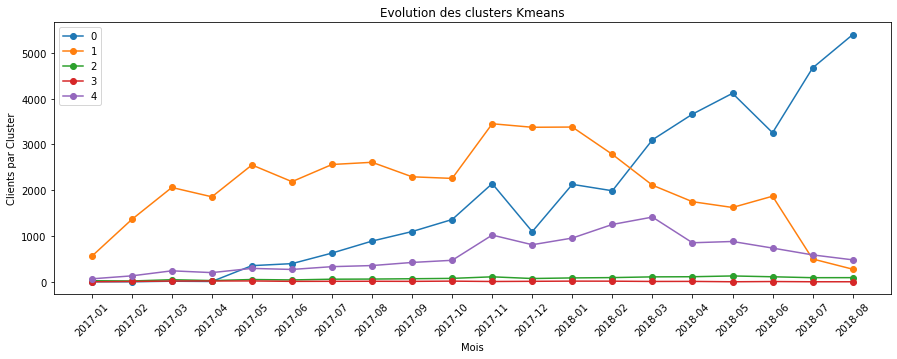

In [12]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()

for col in df_kmeans.columns:
    if col != 'Month':
        ax.plot(df_kmeans['Month'], df_kmeans[col], marker='o', label=col)

plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.ylabel('Clients par Cluster')
plt.title('Evolution des clusters Kmeans')
plt.legend()
plt.show()

## CAH

In [13]:
df_CAH = df.groupby(['Month', 'CAH_cluster']).size().unstack().fillna(0).reset_index()

In [14]:
df_CAH 

CAH_cluster,Month,0,1,2,3,4
0,2017-01,239,202,99,45,58
1,2017-02,574,471,232,100,137
2,2017-03,982,694,358,133,205
3,2017-04,827,622,310,159,187
4,2017-05,1365,853,572,213,260
5,2017-06,1254,795,440,170,242
6,2017-07,1439,956,646,217,327
7,2017-08,1534,992,755,284,358
8,2017-09,1588,961,742,270,326
9,2017-10,1706,955,836,317,361


In [15]:
df_CAH['Month'] = df_CAH['Month'].astype('str')

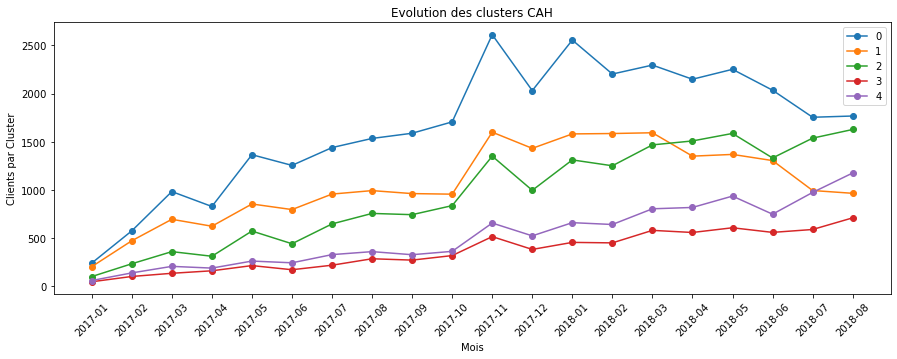

In [16]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()

for col in df_CAH.columns:
    if col != 'Month':
        ax.plot(df_CAH['Month'], df_CAH[col], marker='o', label=col)

plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.ylabel('Clients par Cluster')
plt.title('Evolution des clusters CAH')
plt.legend()
plt.show()

# Maintenance Clusers 2017

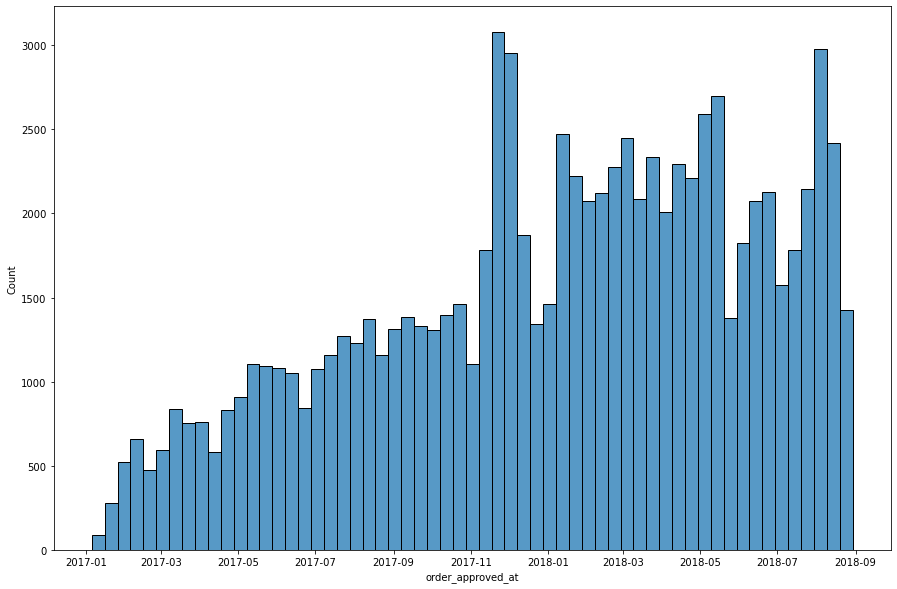

In [17]:
plt.figure(figsize=(15,10))
sns.histplot(df['order_approved_at']);

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score

In [19]:
features = ['experience_client', 'review_classification',
            'temps_livraison_estime', 'temps_de_reponse',
            'longueur_comment_message', 'recency',
            'frequency', 'monetary_value']
# Separating out the features
df = df[features]

In [20]:
df_maintenance = df.copy()

In [21]:
data_test_4_mois =  df_maintenance.loc[(df_maintenance["recency"] > 610) & (df_maintenance["recency"] < 730)]
customers_stability = df.drop(index=data_test_4_mois.index)

## Creation du model avec 4 mois de 2017

In [23]:
k = 5

In [24]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Appliquer le scaler aux colonnes sélectionnées
X = scaler.fit_transform(x)

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_4mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_4mois = kmeans_model_4mois.fit(Principal_components)

# Prédire les labels des données
labels_4mois = model_4mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_4mois" : labels_4mois},
                         index=customers_stability.index)
stability.head(3)

,label_4mois
0,0
1,0
3,3


In [25]:
customers_stability.shape

(84571, 8)

### Comparaison du model 4 mois avec les données sur 1 an

In [26]:
day = range(365, 730, 120)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # Créer une instance de StandardScaler
        scaler = StandardScaler()

        # Appliquer le scaler aux colonnes sélectionnées
        X = scaler.fit_transform(x)

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_4mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

33828
13803
428
0


In [27]:
customers_stability = customers_stability.drop(features, axis=1)

In [28]:
customers_stability=customers_stability.dropna(axis=0)

In [29]:
merged_df_4 = stability.merge(customers_stability, left_index=True, right_index=True)

In [30]:
merged_df_4.shape

(428, 4)

ARI à 0 Mois : 1.0
ARI à 4 Mois : 0.29159865458722695
ARI à 8 Mois : 0.5275582746774237
ARI à 12 Mois : 0.1892196896361794


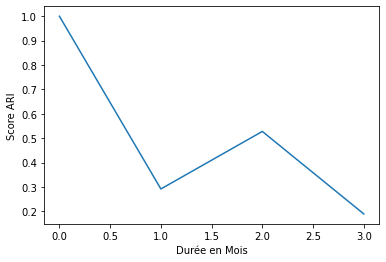

In [31]:
ari_score_4_mois = []
i=-4
for label in merged_df_4.columns:
    i+=4
    score = adjusted_rand_score(
        merged_df_4['label_4mois'],merged_df_4[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_4_mois.append(score)
    months = [0, 4, 8, 12]

df_ari_4 = pd.DataFrame({"Months": months , "ARI Scores 4 mois": ari_score_4_mois})
plt.plot(ari_score_4_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

In [32]:
df_ari_4

,Months,ARI Scores 4 mois
0,0,1.000000
1,4,0.291599
2,8,0.527558
3,12,0.189220


## Création du model avec 3 mois 

In [33]:
data_test_3_mois =  df_maintenance.loc[(df_maintenance["recency"] > 640) & (df_maintenance["recency"] < 730)]
customers_stability = df.drop(index=data_test_3_mois.index)

In [34]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Appliquer le scaler aux colonnes sélectionnées
X = scaler.fit_transform(x)

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_3mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_3mois = kmeans_model_3mois.fit(Principal_components)

# Prédire les labels des données
labels_3mois = model_3mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_3mois" : labels_3mois},
                         index=customers_stability.index)
stability.head(3)

,label_3mois
0,3
1,3
3,0


### Comparaison du model 3 mois avec les données sur 1 an

In [35]:
day = range(365, 730, 90)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # Créer une instance de StandardScaler
        scaler = StandardScaler()

        # Appliquer le scaler aux colonnes sélectionnées
        X = scaler.fit_transform(x)

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_3mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

35942
19804
8574
283
0


In [36]:
customers_stability = customers_stability.drop(features, axis=1)

In [37]:
customers_stability=customers_stability.dropna(axis=0)

In [38]:
merged_df_3 = stability.merge(customers_stability, left_index=True, right_index=True)

In [39]:
merged_df_3.shape

(283, 5)

ARI à 3 Mois : 1.0
ARI à 6 Mois : 0.37167990258497347
ARI à 9 Mois : 0.6664786714384642
ARI à 12 Mois : 0.7762571382011331
ARI à 15 Mois : 0.32418738159367194


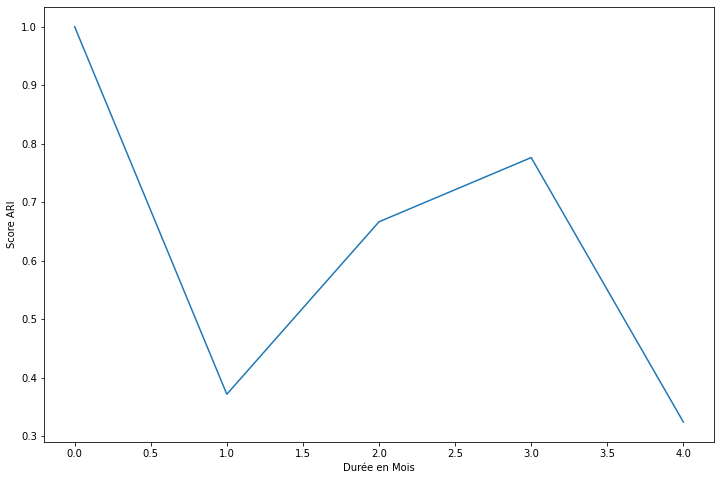

In [40]:
ari_score_3_mois = []
i=0
for label in merged_df_3.columns:
    i+=3
    score = adjusted_rand_score(
        merged_df_3['label_3mois'],merged_df_3[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_3_mois.append(score)
    months = [0, 3, 6, 9, 12]

df_ari_3 = pd.DataFrame({"Months": months, "ARI Scores 3 mois": ari_score_3_mois})
plt.figure(figsize=(12,8))
plt.plot(ari_score_3_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

## Création d'un model avec 2 mois 

In [41]:
data_test_2_mois =  df_maintenance.loc[(df_maintenance["recency"] > 670) & (df_maintenance["recency"] < 730)]
customers_stability = df.drop(index=data_test_2_mois.index)

In [42]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Appliquer le scaler aux colonnes sélectionnées
X = scaler.fit_transform(x)

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_2mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_2mois = kmeans_model_2mois.fit(Principal_components)

# Prédire les labels des données
labels_2mois = model_2mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_2mois" : labels_2mois},
                         index=customers_stability.index)
stability.head(3)

,label_2mois
0,1
1,1
2,0


### Comparaison du model 2 mois avec les données sur 1 an

In [43]:
day = range(365, 730, 60)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # Créer une instance de StandardScaler
        scaler = StandardScaler()

        # Appliquer le scaler aux colonnes sélectionnées
        X = scaler.fit_transform(x)

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_2mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

38217
26092
18192
10849
4817
322
0


In [44]:
customers_stability = customers_stability.drop(features, axis=1)

In [45]:
customers_stability=customers_stability.dropna(axis=0)

In [46]:
merged_df_2 = stability.merge(customers_stability, left_index=True, right_index=True)

In [47]:
merged_df_2.shape

(322, 7)

ARI à 2 Mois : 1.0
ARI à 4 Mois : 0.37100647868689574
ARI à 6 Mois : 0.6904692053903926
ARI à 8 Mois : 0.6534908535418141
ARI à 10 Mois : 0.566800692512351
ARI à 12 Mois : 0.6055069598975517
ARI à 14 Mois : 0.14679835456107884


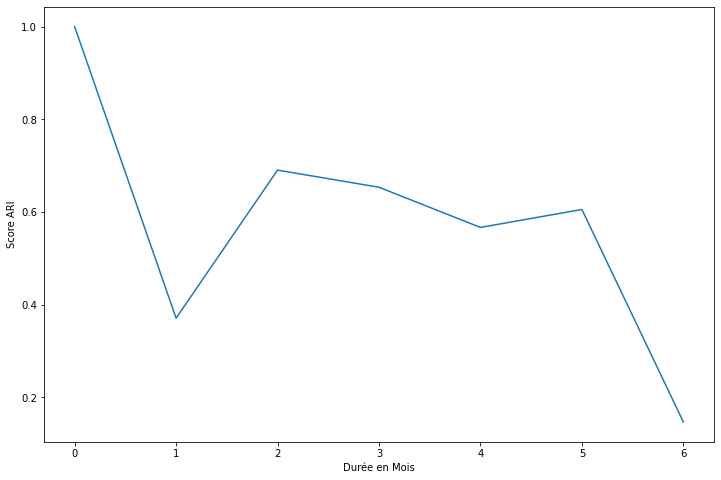

In [48]:
ari_score_2_mois = []
i = 0
for label in merged_df_2.columns:
    i += 2
    score = adjusted_rand_score(
        merged_df_2['label_2mois'], merged_df_2[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_2_mois.append(score)
    months = [0, 2, 4, 6, 8, 10, 12]

df_ari_2 = pd.DataFrame(
    {"Months": months, "ARI Scores 2 mois": ari_score_2_mois})
plt.figure(figsize=(12,8))
plt.plot(ari_score_2_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

## Création d'un model avec 1 mois 

In [49]:
data_test_1_mois =  df_maintenance.loc[(df_maintenance["recency"] > 700) & (df_maintenance["recency"] < 730)]
customers_stability = df.drop(index=data_test_1_mois.index)

In [50]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Appliquer le scaler aux colonnes sélectionnées
X = scaler.fit_transform(x)

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_1mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_1mois = kmeans_model_1mois.fit(Principal_components)

# Prédire les labels des données
labels_1mois = model_1mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_1mois" : labels_1mois},
                         index=customers_stability.index)
stability.head(3)

,label_1mois
0,1
1,1
2,2


### Comparaison du model 1 mois avec les données sur 1 an

In [51]:
day = range(365, 730, 30)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # Créer une instance de StandardScaler
        scaler = StandardScaler()

        # Appliquer le scaler aux colonnes sélectionnées
        X = scaler.fit_transform(x)

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_1mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

39806
34359
27681
23668
19781
15980
12438
9591
6406
4147
1911
247
0


In [52]:
customers_stability = customers_stability.drop(features, axis=1)

In [53]:
customers_stability=customers_stability.dropna(axis=0)

In [54]:
merged_df_1 = stability.merge(customers_stability, left_index=True, right_index=True)

ARI à 1 Mois : 1.0
ARI à 2 Mois : 0.7539005140537007
ARI à 3 Mois : 0.8193502433819209
ARI à 4 Mois : 0.7445475576774808
ARI à 5 Mois : 0.6449431984039614
ARI à 6 Mois : 0.6456656994384105
ARI à 7 Mois : 0.7299439443857844
ARI à 8 Mois : 0.7776701264367349
ARI à 9 Mois : 0.8456739204629615
ARI à 10 Mois : 0.5246206706628657
ARI à 11 Mois : 0.495158530993783
ARI à 12 Mois : 0.10999305871250085
ARI à 13 Mois : 0.08939170969736746


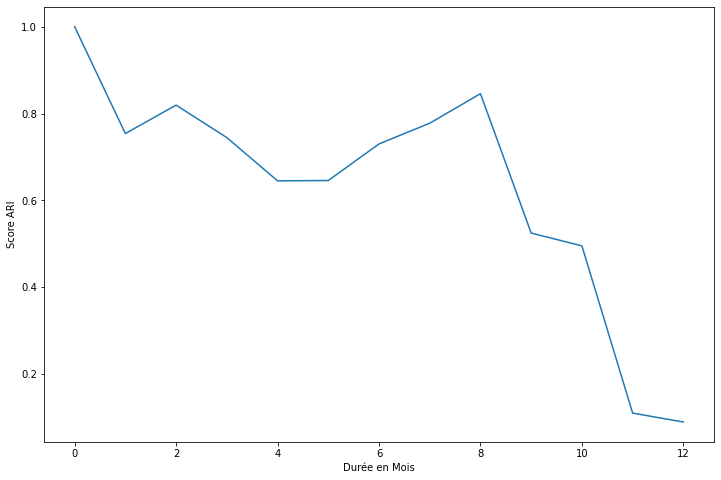

In [55]:
ari_score_1_mois = []
i=0
for label in merged_df_1.columns:
    i+=1
    score = adjusted_rand_score(
        merged_df_1['label_1mois'],merged_df_1[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_1_mois.append(score)
    months = range(0, len(ari_score_1_mois))

df_ari_1 = pd.DataFrame({"Months": months, "ARI Scores 1 mois": ari_score_1_mois})
plt.figure(figsize=(12,8))
plt.plot(ari_score_1_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

In [56]:
df_ari_4

,Months,ARI Scores 4 mois
0,0,1.000000
1,4,0.291599
2,8,0.527558
3,12,0.189220


## Conclusion

In [57]:
df_ari_1_2 = df_ari_1.merge(df_ari_2, on="Months", how='left')
df_ari_1_2_3 = df_ari_1_2.merge(df_ari_3, on="Months", how='left')
df_ari_1_2_3_4 = df_ari_1_2_3.merge(df_ari_4, on="Months", how='left')

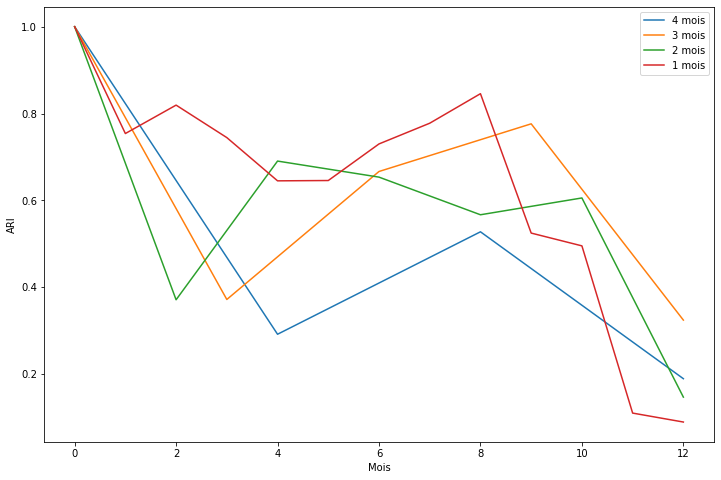

In [58]:
# Affichage du plot
plt.figure(figsize=(12,8))
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 4 mois"], label='4 mois')
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 3 mois"], label='3 mois')
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 2 mois"], label='2 mois')
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 1 mois"], label='1 mois')

plt.legend()
plt.xlabel('Mois')
plt.ylabel('ARI')
plt.show()

# Satisfaction 

In [59]:
features = ['review_classification',
            'longueur_comment_message']
# Separating out the features
df = df[features]

In [60]:
df_satisfaction = df.copy()